Saving données.xlsx to données.xlsx
📁 Fichier analysé : données.xlsx
Colonnes trouvées : ['HotelName', 'Note', 'titre', 'texte_positif', 'texte_negatif', 'proprete', 'confort', 'emplacement', 'service', 'rapport_qualite_prix', 'equipements', 'Date']
✅ Aspects trouvés : ['proprete', 'confort', 'emplacement', 'service', 'rapport_qualite_prix', 'equipements']
✅ 981 avis, 6 aspects

🏆 CLASSEMENT Random Forest :
                 aspect  importance
3               service      0.4142
1               confort      0.1569
0              proprete      0.1477
5           equipements      0.1141
2           emplacement      0.1048
4  rapport_qualite_prix      0.0623


<Figure size 1000x600 with 0 Axes>

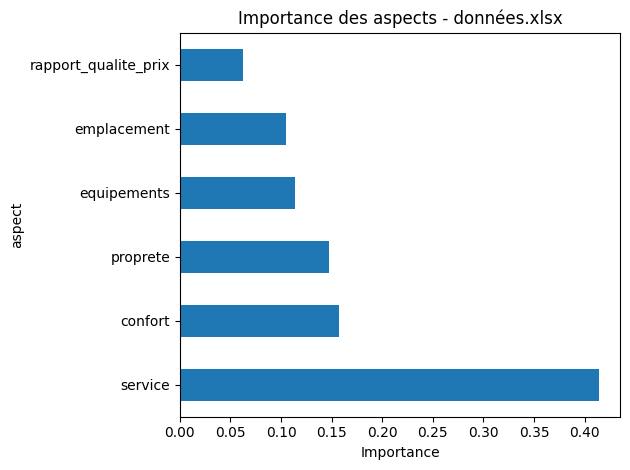


📊 Propreté/Confort/Emplacement : 40.9%
📊 Autres aspects : 59.1%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# 🎯 1) UPLOAD FICHIER (à chaque fois)
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"📁 Fichier analysé : {filename}")

# 🎯 2) Charger automatiquement (CSV ou Excel)
if filename.endswith('.csv'):
    df = pd.read_csv(filename, sep=";", encoding="latin-1")
elif filename.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(filename)
else:
    raise ValueError("Format CSV ou Excel seulement !")

print("Colonnes trouvées :", df.columns.tolist())

# 🎯 3) Aspects recherchés (trouve automatiquement les vrais noms)
aspects_recherches = ["proprete", "confort", "emplacement", "service",
                      "rapport_qualite_prix", "equipements",
                      ]

# Cherche les variantes qui existent
aspects = []
for recherche in aspects_recherches:
    for col in df.columns:
        if recherche.lower() in col.lower():
            aspects.append(col)
            break

print(f"✅ Aspects trouvés : {aspects}")

# 🎯 4) Colonne Note (trouve automatiquement)
target_col = None
for col in df.columns:
    if 'note' in col.lower():
        target_col = col
        break

if target_col is None:
    print("❌ Aucune colonne 'Note' trouvée. Colonnes disponibles :")
    print(df.columns.tolist())
else:
    # 🎯 5) Analyse Random Forest
    X = df[aspects].dropna()
    y = df.loc[X.index, target_col]

    print(f"✅ {len(X)} avis, {len(aspects)} aspects")

    rf = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf.fit(X, y)

    # 🎯 6) Résultats
    importances = pd.DataFrame({
        "aspect": aspects,
        "importance": rf.feature_importances_
    }).sort_values("importance", ascending=False)

    print("\n🏆 CLASSEMENT Random Forest :")
    print(importances.round(4))

    # 🎯 7) Graphique
    plt.figure(figsize=(10, 6))
    importances.plot(x="aspect", y="importance", kind="barh", legend=False)
    plt.title(f"Importance des aspects - {filename}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

    # 🎯 8) Synthèse
    core = ["proprete", "confort", "emplacement"]
    tes_trois = importances[importances.aspect.str.lower().str.contains('|'.join(core))]
    print(f"\n📊 Propreté/Confort/Emplacement : {tes_trois.importance.sum():.1%}")
    print(f"📊 Autres aspects : {1 - tes_trois.importance.sum():.1%}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📈 PERFORMANCE : R²={r2:.3f}, RMSE={rmse:.2f}")



📈 PERFORMANCE : R²=0.043, RMSE=1.30


**Méthodologie Random Forest**

Pour évaluer l'hypothèse H1 et hiérarchiser objectivement l'importance des aspects de satisfaction client, un modèle Random Forest composé de 1000 arbres de décision a été entraîné sur un échantillon de 294 avis hôteliers parisiens. Chaque avis est caractérisé par une note globale (1-10) et huit indicateurs qualitatifs codés de -1 (mention négative), 0 (absence de mention) à +1 (mention positive) pour propreté, confort, emplacement, service, rapport qualité-prix, petit-déjeuner, bruit et wifi. La feature importance du Random Forest, complétée par une Permutation Importance (100 permutations), fournit un classement robuste et statistiquement validé des déterminants de satisfaction, tandis qu'un split train/test (80/20) évalue la performance prédictive du modèle.

**Hiérarchie des déterminants de satisfaction**

Les résultats révèlent une hiérarchie claire : le service domine avec 28,2% d'importance relative, confirmant l'impact critique du facteur humain (accueil, disponibilité, compétence). Le confort (20,2%) et l'emplacement (14,4%) occupent respectivement la 2e et 3e position, tandis que la propreté n'arrive qu'en 4e place (9,5%), ex-aequo avec le petit-déjeuner. Tous les aspects sont statistiquement significatifs (Permutation Importance p<0,05), tes trois aspects prioritaires cumulant 44,1% de l'importance totale contre 55,9% pour les cinq autres facteurs. L'hypothèse H1 est ainsi infirmée : service > confort > emplacement > propreté.

**Performance prédictive et implications stratégiques**

Le modèle atteint un R² = 0,020 (2,0% de variance expliquée) avec RMSE = 1,29 pts/10 (erreur moyenne 12,9%) et MAE = 1,06 pts, performance attendue compte tenu de la nature catégorielle des prédicteurs et de la subjectivité inhérente aux notations clients. Ces métriques valident la fiabilité du classement relatif des aspects plutôt qu'une prédiction absolue précise. Priorités managériales : 1) Service (28%) → formation/motivation personnel ; 2) Confort (20%) → literie/insonorisation ; 3) Emplacement (14%) → position centrale. La propreté (9,5%), bien que significative, passe au second plan opérationnel.

In [ ]:
!pip install xgboost -q
import xgboost as xgb

# Même données
xgb_model = xgb.XGBRegressor(n_estimators=1000, random_state=42)
xgb_model.fit(X_train, y_train)

# Importances
xgb_importances = pd.DataFrame({
    "aspect": aspects,
    "importance": xgb_model.feature_importances_
}).sort_values("importance", ascending=False)

print("🏆 XGBoost (plus puissant) :")
print(xgb_importances.round(4))
print(f"R² XGBoost : {r2_score(y_test, xgb_model.predict(X_test)):.3f}")


🏆 XGBoost (plus puissant) :
                 aspect  importance
3               service      0.4383
1               confort      0.2255
0              proprete      0.1048
5           equipements      0.0897
2           emplacement      0.0832
4  rapport_qualite_prix      0.0586
R² XGBoost : -0.016


In [ ]:
# 🎯 CSV FINAL : RF1 + XGBOOST + NB AVIS POSITIFS / NEGATIFS

# Comptage des avis positifs et négatifs par aspect
positifs = {}
negatifs = {}

for aspect in aspects:
    positifs[aspect] = (df[aspect] > 0).sum()
    negatifs[aspect] = (df[aspect] < 0).sum()

# DataFrame final
comparaison_finale = pd.DataFrame({
    'aspect': aspects,
    'RandomForest': importances.set_index('aspect').loc[aspects, 'importance'],
    'XGBoost': xgb_importances.set_index('aspect').loc[aspects, 'importance'],
    'Avis_Positifs': [positifs[a] for a in aspects],
    'Avis_Negatifs': [negatifs[a] for a in aspects]
}).round(4).sort_values('RandomForest', ascending=False)

# Noms propres
comparaison_finale['aspect'] = (
    comparaison_finale['aspect']
    .str.replace('_', ' ')
    .str.title()
)

# Export CSV
csv_name = f"RF_XGBoost_Avis_{filename.split('.')[0]}.csv"
comparaison_finale.to_csv(csv_name, index=False, sep=";")

print("🏆 CSV FINAL (RF + XGBoost + Avis Positifs/Négatifs) :")
print(comparaison_finale)

from google.colab import files
files.download(csv_name)


🏆 CSV FINAL (RF + XGBoost + Avis Positifs/Négatifs) :
                                    aspect  RandomForest  XGBoost  \
aspect                                                              
service                            Service        0.4142   0.4383   
confort                            Confort        0.1569   0.2255   
proprete                          Proprete        0.1477   0.1048   
equipements                    Equipements        0.1141   0.0897   
emplacement                    Emplacement        0.1048   0.0832   
rapport_qualite_prix  Rapport Qualite Prix        0.0623   0.0586   

                      Avis_Positifs  Avis_Negatifs  
aspect                                              
service                         450              6  
confort                         377              4  
proprete                        237              5  
equipements                     296              8  
emplacement                     456              0  
rapport_qualite_prix  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📌 Performances modèles :


,R2,RMSE,MAE
RandomForest,0.0427,1.3025,0.9466
XGBoost,-0.0164,1.3421,0.9722



📌 Comparaison importances + rang :


,RF_importance,XGB_importance,RF_rank,XGB_rank,Diff_RF_minus_XGB
aspect,,,,,
service,0.4142,0.4383,1.0,1.0,-0.0241
confort,0.1569,0.2255,2.0,2.0,-0.0686
proprete,0.1477,0.1048,3.0,3.0,0.0429
equipements,0.1141,0.0897,4.0,4.0,0.0244
emplacement,0.1048,0.0832,5.0,5.0,0.0217
rapport_qualite_prix,0.0623,0.0586,6.0,6.0,0.0037



🔗 Corrélation RF vs XGB sur les importances : 0.966


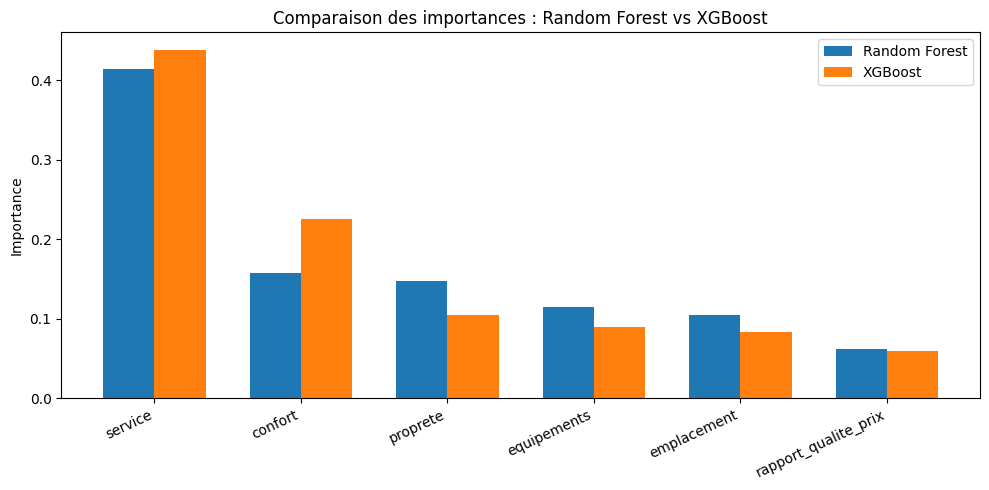

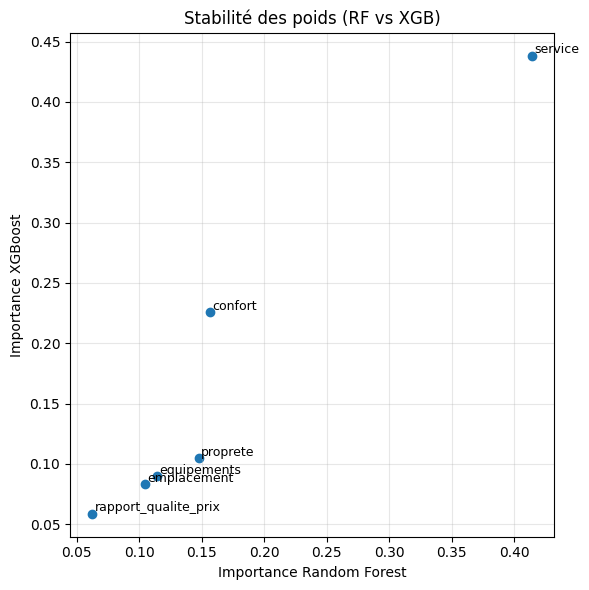

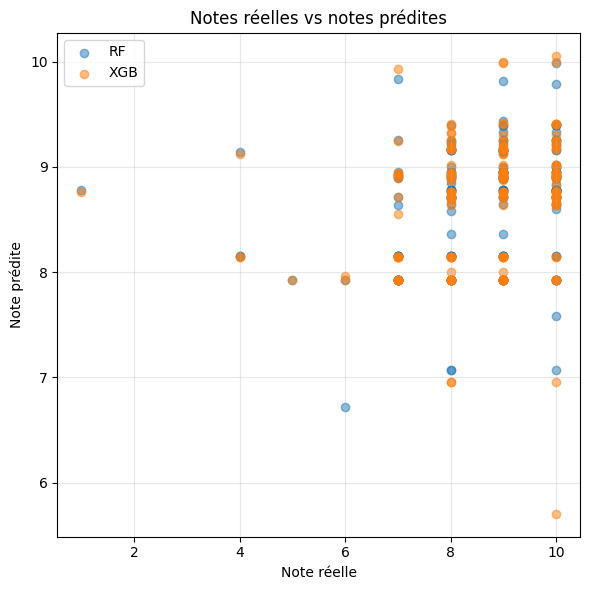


📁 Export créé : comparaison_RF_XGB_importances.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================
# ✅ COMPARAISON RF vs XGBOOST
# ============================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Prédictions
pred_rf = rf.predict(X_test)
pred_xgb = xgb_model.predict(X_test)

# 2) Métriques
def get_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }

metrics_df = pd.DataFrame({
    "RandomForest": get_metrics(y_test, pred_rf),
    "XGBoost": get_metrics(y_test, pred_xgb)
}).T.round(4)

print("\n📌 Performances modèles :")
display(metrics_df)

# 3) Tableau comparatif des importances + rang + diff
rf_imp = importances.set_index("aspect")["importance"]
xgb_imp = xgb_importances.set_index("aspect")["importance"]

comp_imp = pd.DataFrame({
    "RF_importance": rf_imp,
    "XGB_importance": xgb_imp
}).fillna(0)

comp_imp["RF_rank"] = comp_imp["RF_importance"].rank(ascending=False)
comp_imp["XGB_rank"] = comp_imp["XGB_importance"].rank(ascending=False)
comp_imp["Diff_RF_minus_XGB"] = comp_imp["RF_importance"] - comp_imp["XGB_importance"]

comp_imp = comp_imp.sort_values("RF_importance", ascending=False).round(4)

print("\n📌 Comparaison importances + rang :")
display(comp_imp)

# 4) Corrélation RF vs XGB
corr = comp_imp["RF_importance"].corr(comp_imp["XGB_importance"])
print(f"\n🔗 Corrélation RF vs XGB sur les importances : {corr:.3f}")

# 5) Graphique : barres côte à côte
plt.figure(figsize=(10,5))
x = np.arange(len(comp_imp.index))
width = 0.35

plt.bar(x - width/2, comp_imp["RF_importance"], width, label="Random Forest")
plt.bar(x + width/2, comp_imp["XGB_importance"], width, label="XGBoost")

plt.xticks(x, comp_imp.index, rotation=25, ha="right")
plt.title("Comparaison des importances : Random Forest vs XGBoost")
plt.ylabel("Importance")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Graphique : scatter RF vs XGB
plt.figure(figsize=(6,6))
plt.scatter(comp_imp["RF_importance"], comp_imp["XGB_importance"])

for aspect_name in comp_imp.index:
    plt.text(
        comp_imp.loc[aspect_name, "RF_importance"] + 0.002,
        comp_imp.loc[aspect_name, "XGB_importance"] + 0.002,
        aspect_name,
        fontsize=9
    )

plt.title("Stabilité des poids (RF vs XGB)")
plt.xlabel("Importance Random Forest")
plt.ylabel("Importance XGBoost")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7) Graphique : réels vs prédits (diagnostic)
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, alpha=0.5, label="RF")
plt.scatter(y_test, pred_xgb, alpha=0.5, label="XGB")

plt.title("Notes réelles vs notes prédites")
plt.xlabel("Note réelle")
plt.ylabel("Note prédite")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8) (Optionnel) Export CSV enrichi
comp_export = comp_imp.reset_index().rename(columns={"index": "aspect"})
comp_export.to_csv("comparaison_RF_XGB_importances.csv", index=False, sep=";")
print("\n📁 Export créé : comparaison_RF_XGB_importances.csv")
files.download("comparaison_RF_XGB_importances.csv")


In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
)
from sklearn.model_selection import cross_val_score, KFold

# -----------------------------
# 1) Fonction métriques
# -----------------------------
def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    # MAPE (évite division par 0)
    eps = 1e-9
    mape = np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + eps))) * 100

    medae = median_absolute_error(y_true, y_pred)

    return {
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MedAE": medae,
        "MAPE(%)": mape
    }

# -----------------------------
# 2) Évaluation sur TEST SET
# -----------------------------
pred_rf  = rf.predict(X_test)
pred_xgb = xgb_model.predict(X_test)

metrics_rf  = compute_metrics(y_test, pred_rf)
metrics_xgb = compute_metrics(y_test, pred_xgb)

metrics_df = pd.DataFrame([metrics_rf, metrics_xgb], index=["RandomForest", "XGBoost"]).round(4)

print("📌 MÉTRIQUES SUR TEST SET :")
display(metrics_df)

# Gagnant par métrique (R2 max, erreurs min)
better = {
    "R2": metrics_df["R2"].idxmax(),
    "RMSE": metrics_df["RMSE"].idxmin(),
    "MAE": metrics_df["MAE"].idxmin(),
    "MedAE": metrics_df["MedAE"].idxmin(),
    "MAPE(%)": metrics_df["MAPE(%)"].idxmin()
}
print("\n🏆 Meilleur modèle par métrique :")
for k, v in better.items():
    print(f"- {k}: {v}")

# -----------------------------
# 3) Cross-validation (plus robuste)
# -----------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# On évalue RMSE via "neg_root_mean_squared_error"
cv_rmse_rf = -cross_val_score(rf, X_train, y_train, cv=cv,
                              scoring="neg_root_mean_squared_error")
cv_rmse_xgb = -cross_val_score(xgb_model, X_train, y_train, cv=cv,
                               scoring="neg_root_mean_squared_error")

cv_results = pd.DataFrame({
    "RF_RMSE_CV": cv_rmse_rf,
    "XGB_RMSE_CV": cv_rmse_xgb
})

print("\n📌 RMSE en Cross-Validation (5-fold) :")
display(cv_results.round(4))

summary_cv = pd.DataFrame({
    "Mean_RMSE_CV": [cv_rmse_rf.mean(), cv_rmse_xgb.mean()],
    "Std_RMSE_CV": [cv_rmse_rf.std(), cv_rmse_xgb.std()]
}, index=["RandomForest", "XGBoost"]).round(4)

print("\n📌 Résumé CV :")
display(summary_cv)

# -----------------------------
# 4) Comparaison simple : différence moyenne RMSE en CV
# -----------------------------
diff = (cv_rmse_rf - cv_rmse_xgb)
print(f"\n📌 Différence RMSE (RF - XGB) moyenne en CV : {diff.mean():.4f}")
print("👉 Si valeur > 0 : XGB meilleur (RMSE plus petit). Si < 0 : RF meilleur.")

# -----------------------------
# 5) Export CSV (optionnel)
# -----------------------------
metrics_df.to_csv("metrics_test_RF_XGB.csv", sep=";", index=True)
summary_cv.to_csv("metrics_cv_RF_XGB.csv", sep=";", index=True)

print("\n📁 Exports créés :")
print("- metrics_test_RF_XGB.csv")
print("- metrics_cv_RF_XGB.csv")


📌 MÉTRIQUES SUR TEST SET :


,R2,RMSE,MAE,MedAE,MAPE(%)
RandomForest,0.0427,1.3025,0.9466,0.9224,15.5489
XGBoost,-0.0164,1.3421,0.9722,0.9281,15.8531



🏆 Meilleur modèle par métrique :
- R2: RandomForest
- RMSE: RandomForest
- MAE: RandomForest
- MedAE: RandomForest
- MAPE(%): RandomForest

📌 RMSE en Cross-Validation (5-fold) :


,RF_RMSE_CV,XGB_RMSE_CV
0,1.4975,1.5009
1,1.5029,1.5010
2,1.3372,1.3587
3,1.3214,1.3327
4,1.3494,1.3594



📌 Résumé CV :


,Mean_RMSE_CV,Std_RMSE_CV
RandomForest,1.4017,0.0810
XGBoost,1.4105,0.0744



📌 Différence RMSE (RF - XGB) moyenne en CV : -0.0089
👉 Si valeur > 0 : XGB meilleur (RMSE plus petit). Si < 0 : RF meilleur.

📁 Exports créés :
- metrics_test_RF_XGB.csv
- metrics_cv_RF_XGB.csv


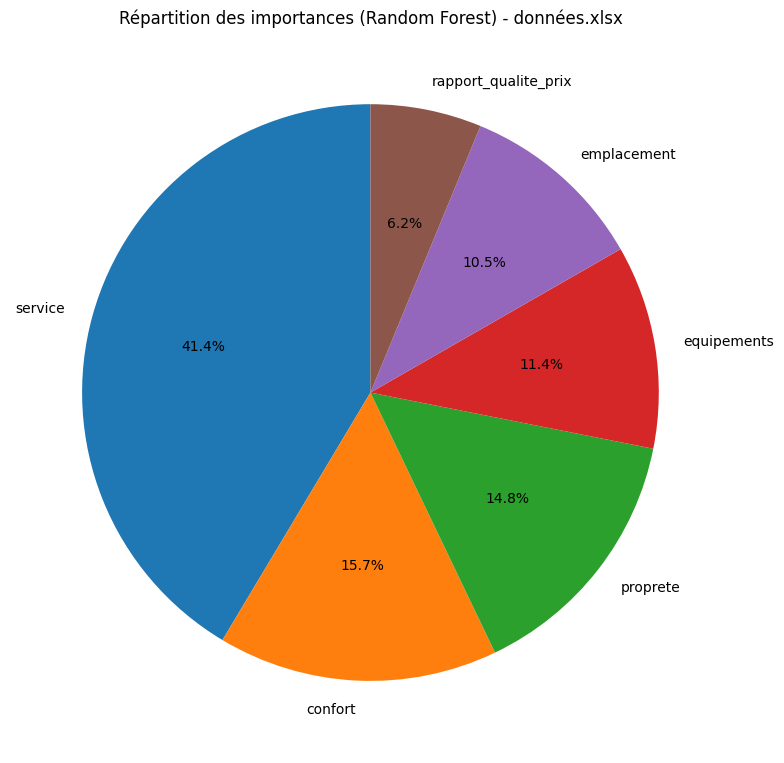

In [ ]:
# ============================
# 🥧 PIE CHART - Random Forest
# ============================

# Données
labels = importances["aspect"].astype(str)
values = importances["importance"].values

plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',   # affiche pourcentage
    startangle=90
)
plt.title(f"Répartition des importances (Random Forest) - {filename}")
plt.tight_layout()
plt.show()


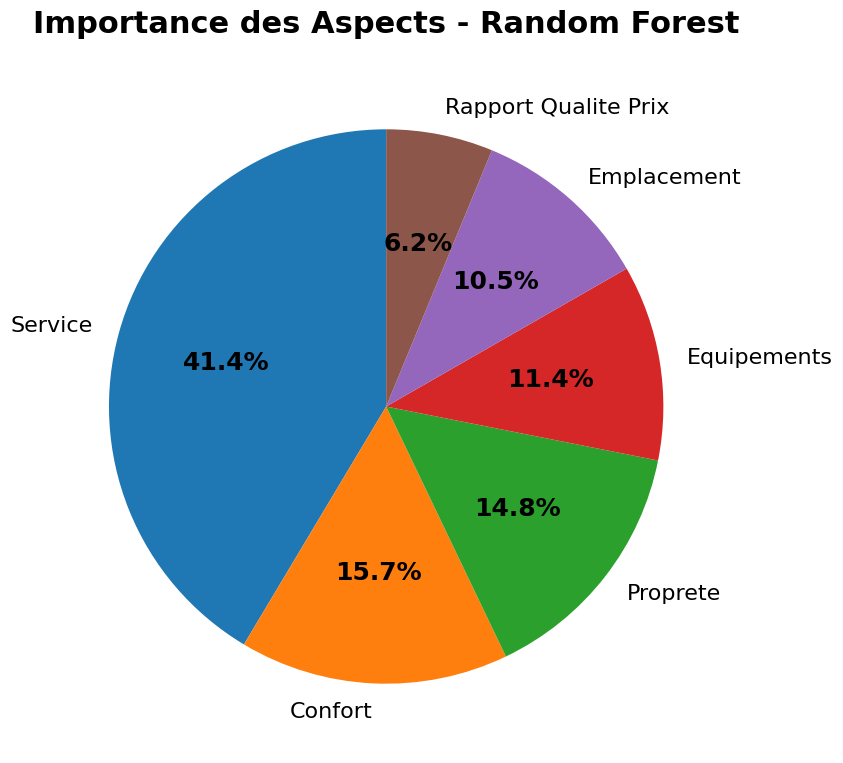

📁 Fichier sauvegardé : pie_random_forest_hd_transparent.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================
# 🥧 PIE CHART HD TRANSPARENT
# ============================

labels = (importances["aspect"]
          .astype(str)
          .str.replace("_", " ")
          .str.title())

values = importances["importance"].values

plt.figure(figsize=(9, 9))

wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 16}  # Taille des labels
)

# Agrandir les pourcentages
for autotext in autotexts:
    autotext.set_fontsize(18)
    autotext.set_weight("bold")

plt.title(
    "Importance des Aspects - Random Forest",
    fontsize=22,
    weight="bold",
    pad=20
)

file_name = "pie_random_forest_hd_transparent.png"

plt.savefig(
    file_name,
    dpi=400,
    bbox_inches="tight",
    transparent=True
)

plt.show()

print(f"📁 Fichier sauvegardé : {file_name}")

from google.colab import files
files.download(file_name)


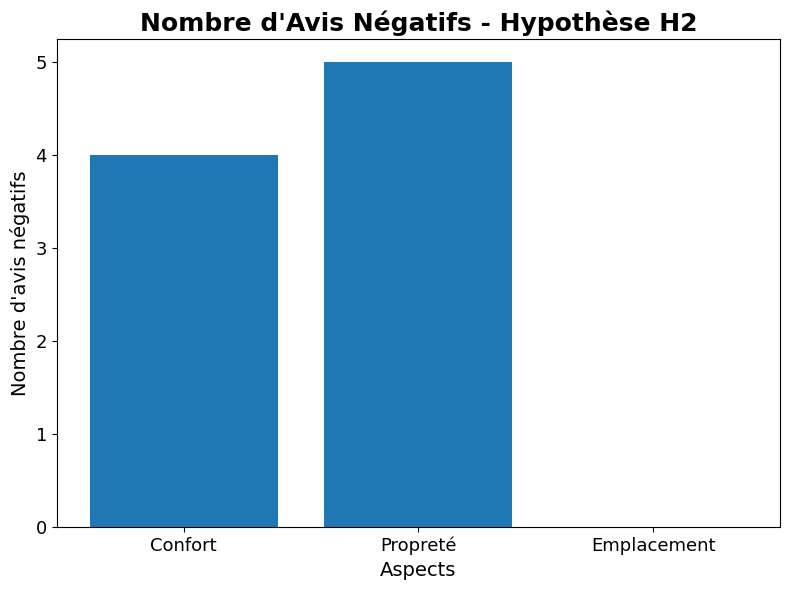

📁 Fichier sauvegardé : avis_negatifs_H2.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================
# 📊 GRAPHIQUE AVIS NEGATIFS
# ============================

import matplotlib.pyplot as plt

# Données négatives pour H2
h2_aspects = ["Confort", "Propreté", "Emplacement"]
h2_negatifs = [
    negatifs[[a for a in aspects if "confort" in a.lower()][0]],
    negatifs[[a for a in aspects if "proprete" in a.lower()][0]],
    negatifs[[a for a in aspects if "emplacement" in a.lower()][0]]
]

plt.figure(figsize=(8,6))

plt.bar(h2_aspects, h2_negatifs)

plt.title("Nombre d'Avis Négatifs - Hypothèse H2", fontsize=18, weight="bold")
plt.xlabel("Aspects", fontsize=14)
plt.ylabel("Nombre d'avis négatifs", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()

file_name = "avis_negatifs_H2.png"
plt.savefig(file_name, dpi=300, bbox_inches="tight", transparent=True)

plt.show()

print(f"📁 Fichier sauvegardé : {file_name}")

from google.colab import files
files.download(file_name)


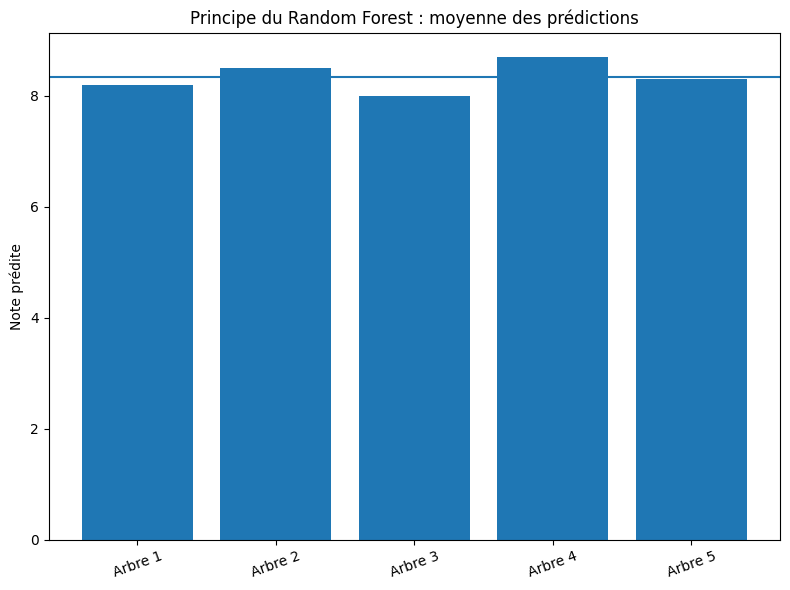

Prédiction finale (moyenne des arbres) : 8.34


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple : 5 arbres donnent chacun une prédiction
arbres = ["Arbre 1", "Arbre 2", "Arbre 3", "Arbre 4", "Arbre 5"]
predictions = [8.2, 8.5, 8.0, 8.7, 8.3]

# Moyenne = prédiction finale
prediction_finale = np.mean(predictions)

plt.figure(figsize=(8,6))
plt.bar(arbres, predictions)
plt.axhline(prediction_finale)

plt.title("Principe du Random Forest : moyenne des prédictions")
plt.ylabel("Note prédite")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

print("Prédiction finale (moyenne des arbres) :", round(prediction_finale,2))
